# Import Library

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [2]:
# Mengimpor dataset MNIST dari TensorFlow
from tensorflow.keras.datasets import mnist

In [3]:
# Memuat data MNIST, memisahkannya menjadi data pelatihan dan data pengujian
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Memeriksa bentuk (shape) data pelatihan dan data pengujian
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [5]:
# Memeriksa bentuk (shape) label untuk data pelatihan dan data pengujian
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [6]:
# Memeriksa bentuk (shape) dari satu sampel data pelatihan pertama
train_data[0].shape

(28, 28)

In [7]:
# Memeriksa bentuk (shape) label untuk data pelatihan
train_labels.shape

(60000,)

### Combine Train and Test Data

In [8]:
# Menggabungkan data pelatihan dan data pengujian
digits_data = np.vstack([train_data, test_data])

# Menggabungkan label pelatihan dan label pengujian
digits_labels = np.hstack([train_labels, test_labels])

In [9]:
# Memeriksa bentuk (shape) dari digits_data
digits_data.shape

(70000, 28, 28)

In [10]:
# Memeriksa bentuk (shape) dari digits_labels
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 0')

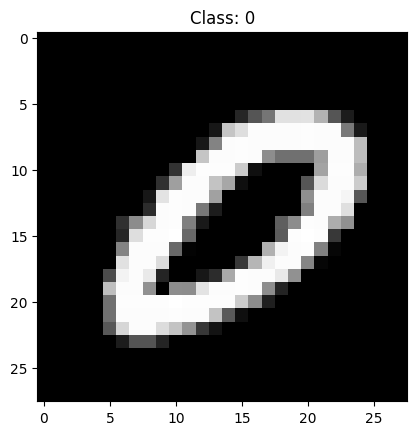

In [11]:
# Menghasilkan indeks acak untuk memilih satu sampel dari dataset
idx = np.random.randint(0, digits_data.shape[0])

# Menampilkan gambar dari dataset pada indeks yang dipilih secara acak
plt.imshow(digits_data[idx], cmap='gray')

# Menambahkan judul ke plot dengan menampilkan kelas (label) yang sesuai dengan gambar
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

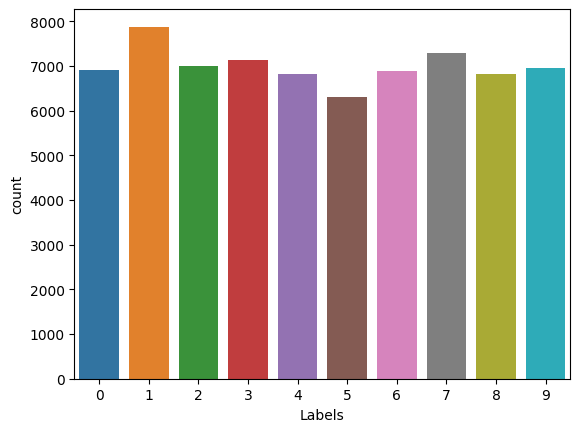

In [12]:
# Membuat DataFrame dari labels
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])

# Menggunakan Seaborn untuk membuat count plot yang menampilkan distribusi label
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [13]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-04 00:53:15--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  56.7MB/s    in 3.3s    

2023-12-04 00:53:18 (55.8 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [14]:
# Mengekstraksi berkas zip
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [15]:
# Membaca dataset 'A_Z Handwritten Data.csv' dan mengubahnya menjadi float32
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

# Menampilkan dataset
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Memisahkan data piksel (pixel data) dari dataset
alphabet_data = dataset_az.drop('0', axis=1)

# Memisahkan label dari dataset
alphabet_labels = dataset_az['0']

In [17]:
# Memeriksa bentuk (shape) dari alphabet_data dan alphabet_labels
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [18]:
# Memeriksa bentuk (shape) dari alphabet_labels
alphabet_labels.shape

(372450,)

In [19]:
# Mengubah bentuk (reshape) data piksel menjadi (jumlah_sampel, 28, 28)
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

# Memeriksa hasil dengan melihat bentuk (shape)
alphabet_data.shape

(372450, 28, 28)

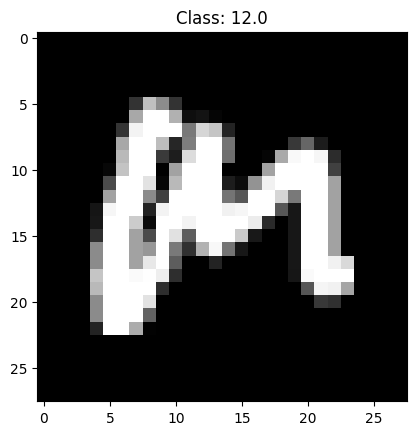

In [20]:
# Menghasilkan indeks acak untuk memilih satu sampel dari dataset A-Z
index = np.random.randint(0, alphabet_data.shape[0])

# Menampilkan gambar dari dataset pada indeks yang dipilih secara acak
plt.imshow(alphabet_data[index], cmap='gray')

# Menambahkan judul ke plot dengan menampilkan kelas (label) yang sesuai dengan gambar
plt.title('Class: ' + str(alphabet_labels[index]))

<Axes: xlabel='Labels', ylabel='count'>

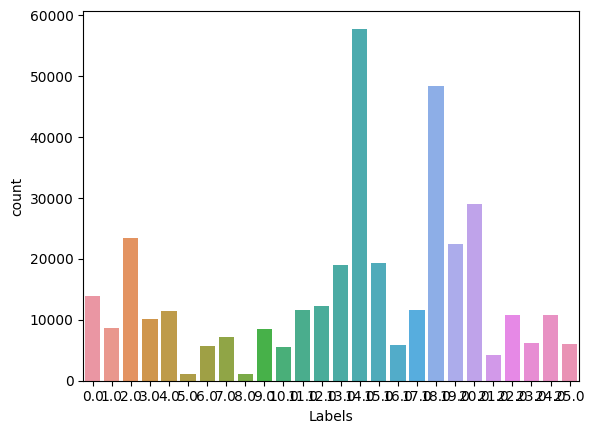

In [21]:
# Membuat DataFrame dari label dalam dataset A-Z
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})

# Menggunakan Seaborn untuk membuat count plot yang menampilkan distribusi label
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

In [22]:
# Menampilkan nilai unik dari digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
# Menampilkan nilai unik dari alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [24]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [25]:
# Menampilkan nilai unik dari alphabet_labels lagi
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [26]:
# gabungkan keduanya
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [27]:
# Menampilkan bentuk (shape) dari data dan label
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [28]:
# Menampilkan nilai unik dari alphabet_labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [29]:
# Mengonversi data menjadi tipe data float32
data = np.array(data, dtype='float32')

In [30]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

# Preprocessing

In [31]:
# Normalisasi datanya
data /= 255.0

In [32]:
# Memeriksa nilai minimum dan maksimum dalam elemen pertama dari array data
data[0].min(), data[0].max()

(0.0, 1.0)

In [33]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [34]:
# mengecek shape label
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

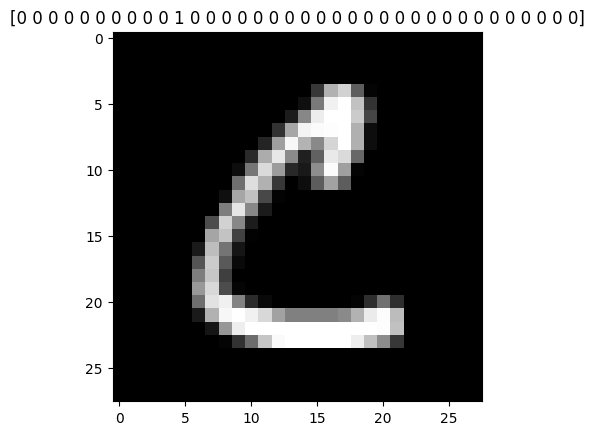

In [35]:
# Mengecek data menggunakan label binary
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [36]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Mengecek angka data tiap label
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [37]:
# Mengecek nilai terbesar
classes_total.max()

57825

In [38]:
# Membuat bobot tiap data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Mengecek bobot untuk setiap data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [40]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [42]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
# membuat jaringan
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [44]:
# mengecek rangkuman network
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [45]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [46]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [47]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [48]:
# Fit the model - fit model CNN dengan epoch 20
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2307 - accuracy: 0.8224
Epoch 1: val_loss improved from inf to 0.30326, saving model to custom_ocr.model
2765/2765 [==============================] - 501s 180ms/step - loss: 2.2307 - accuracy: 0.8224 - val_loss: 0.3033 - val_accuracy: 0.8703
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9968 - accuracy: 0.8995
Epoch 2: val_loss improved from 0.30326 to 0.23574, saving model to custom_ocr.model
2765/2765 [==============================] - 494s 178ms/step - loss: 0.9968 - accuracy: 0.8995 - val_loss: 0.2357 - val_accuracy: 0.9144
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8333 - accuracy: 0.9116
Epoch 3: val_loss did not improve from 0.23574
2765/2765 [==============================] - 517s 187ms/step - loss: 0.8333 - accuracy: 0.9116 - val_loss: 0.2407 - val_accuracy: 0.8962
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7393 - a

# Evaluate Model

## Make a Single Prediction

In [49]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 25s 35ms/step


In [50]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([9.79915679e-14, 1.34615785e-09, 1.35605616e-09, 7.76754182e-12,
       2.96133913e-13, 2.67370108e-08, 3.84979673e-13, 3.54960894e-10,
       3.33322502e-11, 7.63025602e-13, 3.53685776e-13, 1.79322841e-11,
       8.14896417e-09, 7.94349031e-10, 5.73249281e-10, 5.09750997e-08,
       7.23582791e-11, 9.40923728e-12, 9.99440074e-01, 5.55900391e-04,
       9.68234115e-09, 1.14154254e-07, 4.15967998e-12, 5.45145318e-10,
       1.22983392e-08, 4.93103225e-13, 1.94280594e-12, 2.31817943e-09,
       7.55316698e-09, 3.60824561e-06, 1.53683946e-08, 1.61375548e-11,
       7.90391537e-12, 4.94611641e-08, 1.44254947e-11, 1.01319642e-07],
      dtype=float32)

In [51]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

In [52]:
# Check label for 24
name_labels[18]

'I'

In [53]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
# check the highest value
np.argmax(y_test[1])

18

In [55]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [56]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 34s 12ms/step - loss: 0.1946 - accuracy: 0.9193


[0.19461126625537872, 0.9193242192268372]

In [57]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.24      0.81      0.36      1381
           1       0.98      0.99      0.98      1575
           2       0.93      0.96      0.94      1398
           3       0.97      0.99      0.98      1428
           4       0.88      0.98      0.93      1365
           5       0.42      0.96      0.58      1263
           6       0.95      0.98      0.97      1375
           7       0.95      0.99      0.97      1459
           8       0.95      0.99      0.97      1365
           9       0.96      0.98      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.97      0.98      1734
           C       0.99      0.98      0.99      4682
           D       0.95      0.95      0.95      2027
           E       0.99      0.97      0.98      2288
           F       0.87      1.00      0.93       233
           G       0.98      0.93      0.96      1152
           H       0.99    

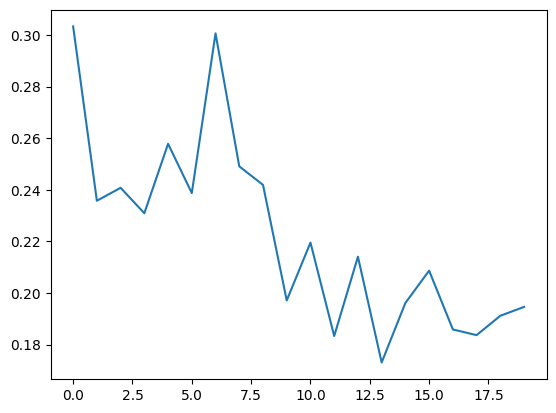

In [58]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [59]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

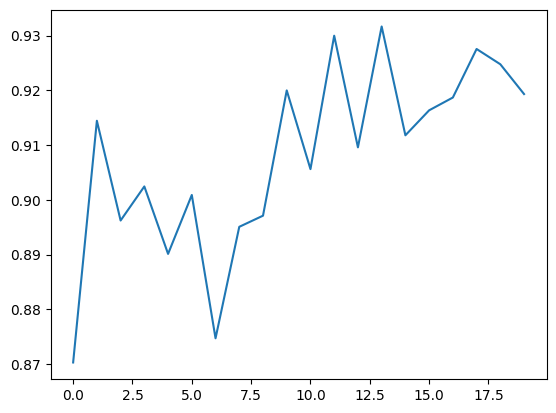

In [60]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

# Save The Model

In [61]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [62]:
# Import library
from tensorflow.keras.models import load_model

In [63]:
# Load saved network
load_network = load_model('network')

In [64]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

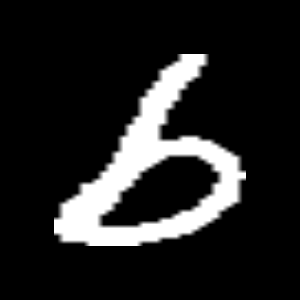

In [66]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [67]:
# Check shape
img.shape

(300, 300, 3)

In [68]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

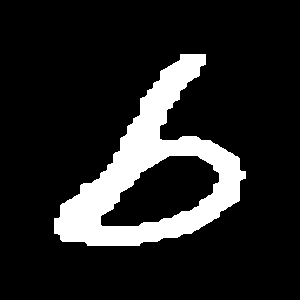

120.0


In [69]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [70]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [71]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [72]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [73]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 98ms/step


6

In [74]:
# check label for 6
name_labels[6]

'6'

## Kesimpulan
Dari hasil tes di atas, dapat disimpulkan bahwa model CNN yang telah dilatih dengan data MNIST dan Kaggle A-Z dapat menghasilkan prediksi yang cukup akurat pada gambar huruf.